## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [18]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df= kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1554147302.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df= kagglehub.load_dataset(


Using Colab cache for faster access to the 'customer-shopping-trends-dataset' dataset.


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

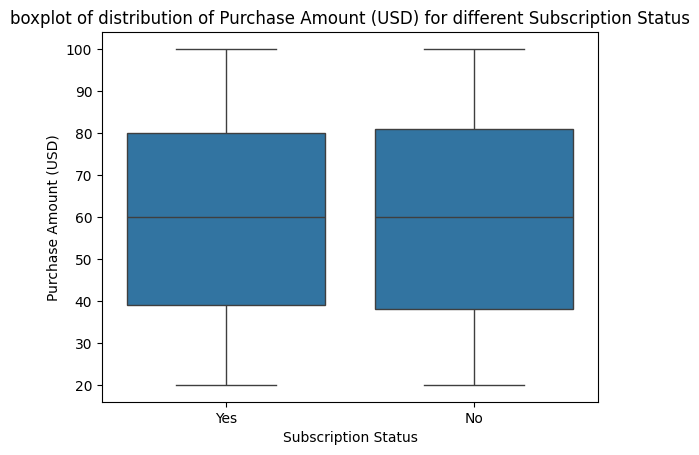

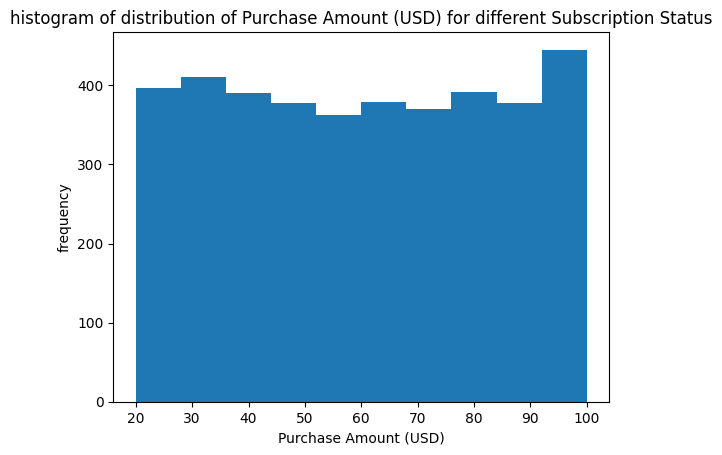

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Subscription Status',y='Purchase Amount (USD)',data=df)
plt.title('boxplot of distribution of Purchase Amount (USD) for different Subscription Status')
plt.show()

plt.hist(df['Purchase Amount (USD)'])
plt.title('histogram of distribution of Purchase Amount (USD) for different Subscription Status')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('frequency')
plt.show()

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

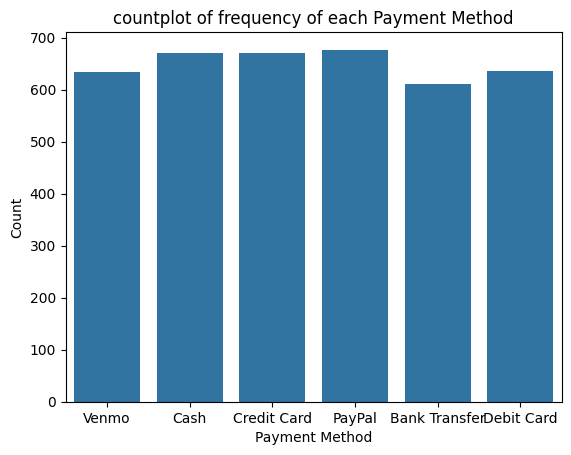

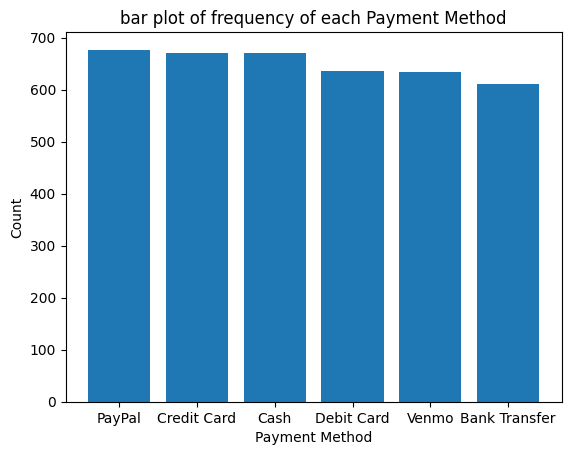

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Payment Method',data=df)
plt.title('countplot of frequency of each Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

plt.bar(df['Payment Method'].value_counts().index,df['Payment Method'].value_counts().values)
plt.title('bar plot of frequency of each Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

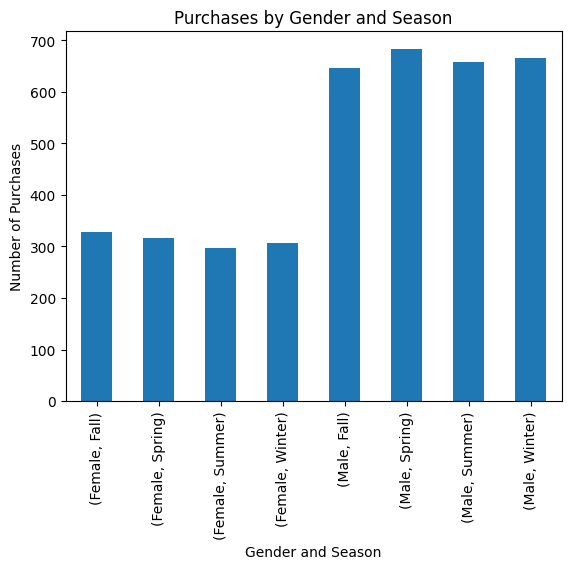

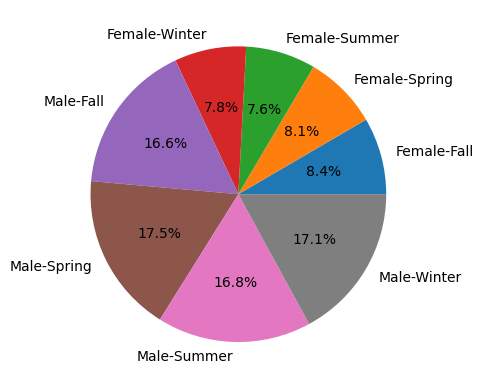

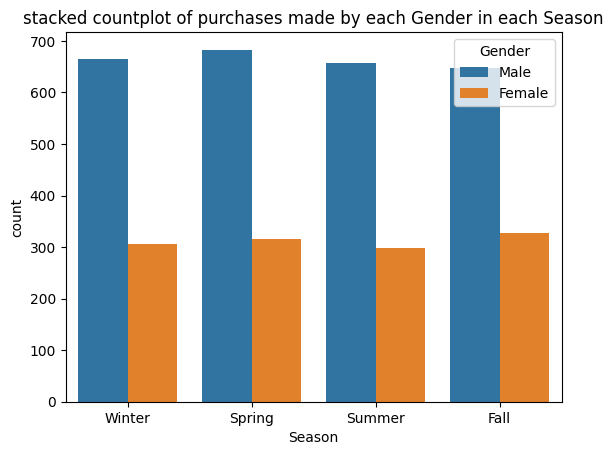

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

x=df.groupby(['Gender','Season'])['Purchase Amount (USD)'].count()
x.plot(kind='bar')
plt.ylabel('Number of Purchases')
plt.xlabel('Gender and Season')
plt.title('Purchases by Gender and Season')
plt.show()

y=[f"{gender}-{season}"for gender,season in x.index]
z=x.values
plt.pie(z,labels=y,autopct='%1.1f%%')
plt.show()

sns.countplot(x='Season',hue='Gender',data=df)
plt.title('stacked countplot of purchases made by each Gender in each Season')
plt.show()


### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

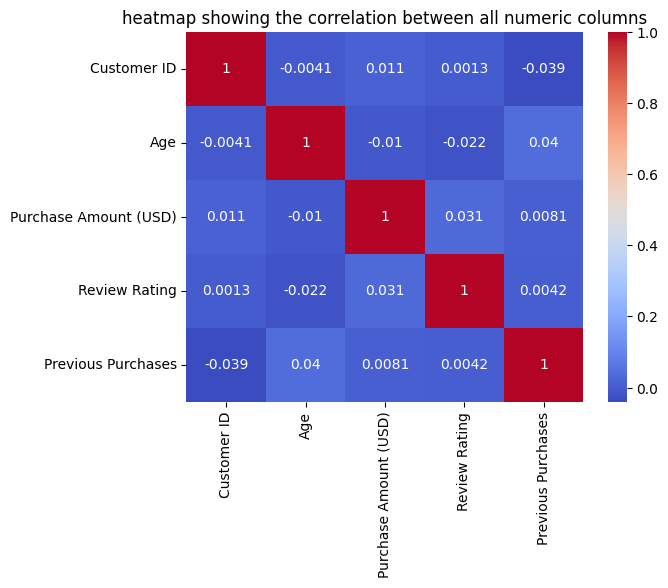

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_data=df.select_dtypes(include=['float64','int64'])
corr=numerical_data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('heatmap showing the correlation between all numeric columns')
plt.show()

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

/tmp/ipython-input-1516649974.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


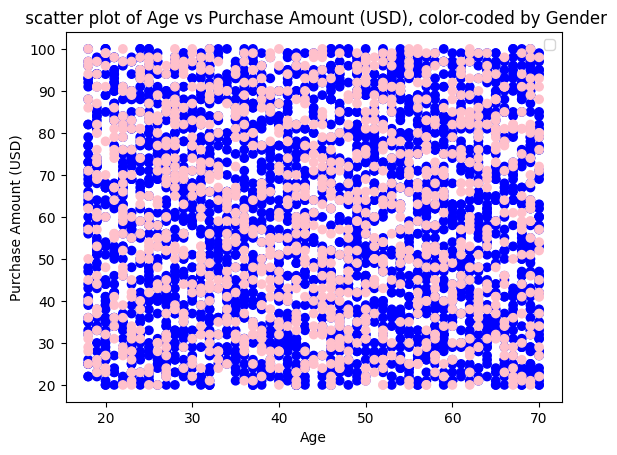

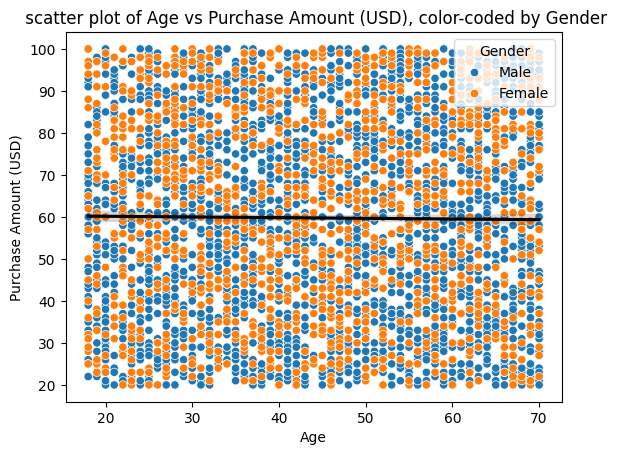

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

colors= ["blue"  if Gender=='Male' else "pink" for Gender in df['Gender'] ]
plt.scatter(df['Age'],df['Purchase Amount (USD)'],c=colors)
plt.title(' scatter plot of Age vs Purchase Amount (USD), color-coded by Gender')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend()
plt.show()

sns.scatterplot(x='Age',y='Purchase Amount (USD)',data=df,hue='Gender')
sns.regplot(x='Age', y='Purchase Amount (USD)', data=df, scatter=False, color='black')
plt.title(' scatter plot of Age vs Purchase Amount (USD), color-coded by Gender')
plt.show()


### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

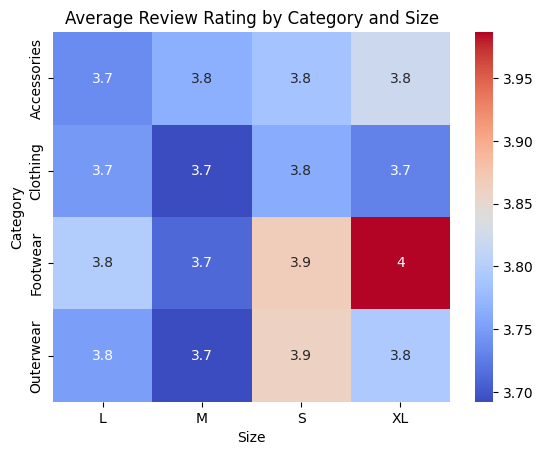

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df.pivot_table(values='Review Rating', index='Category', columns='Size', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Average Review Rating by Category and Size')
plt.show()

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

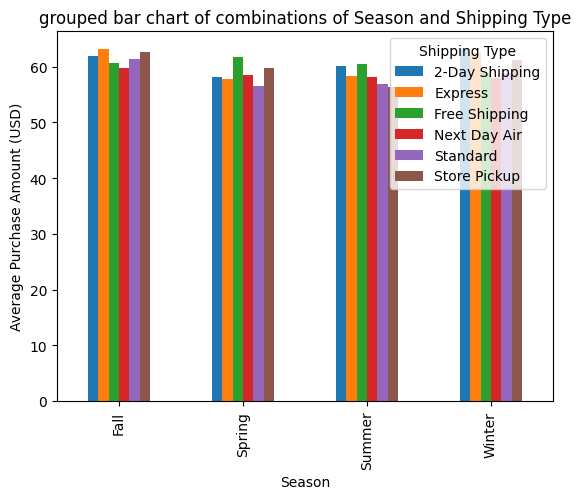

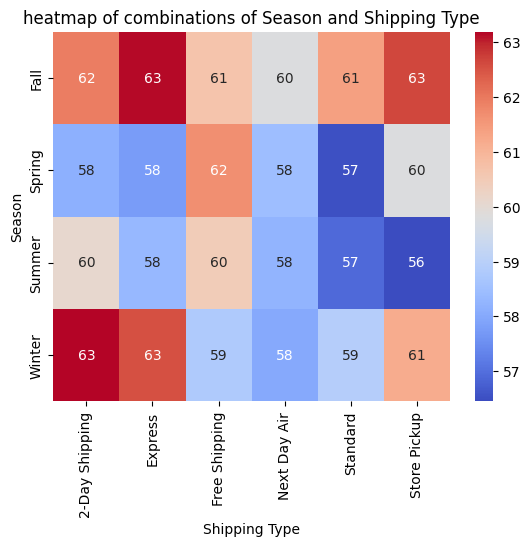

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

x=df.groupby(['Season','Shipping Type'])['Purchase Amount (USD)'].mean().unstack()
x.plot(kind='bar')
plt.title('grouped bar chart of combinations of Season and Shipping Type')
plt.ylabel('Average Purchase Amount (USD)')
plt.xlabel('Season')
plt.show()

sns.heatmap(x,annot=True,cmap='coolwarm')
plt.title('heatmap of combinations of Season and Shipping Type')
plt.show()

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

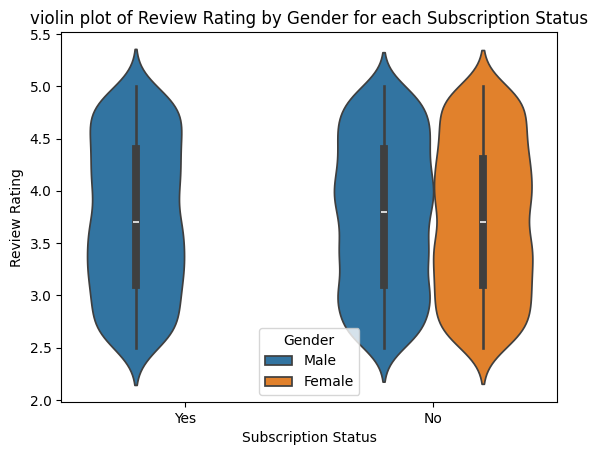

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='Subscription Status',y='Review Rating',hue='Gender',data=df)
plt.title('violin plot of Review Rating by Gender for each Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Review Rating')
plt.show()

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

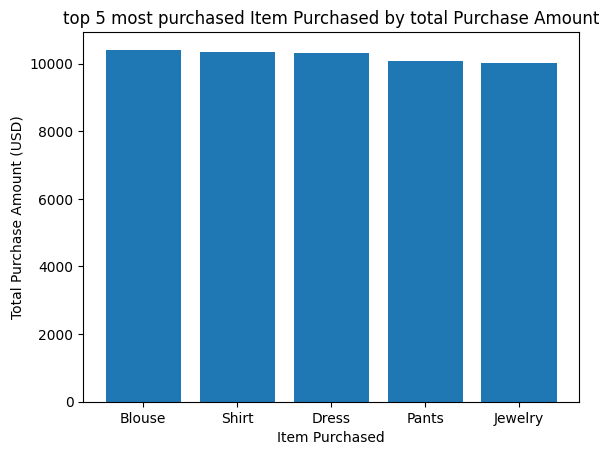

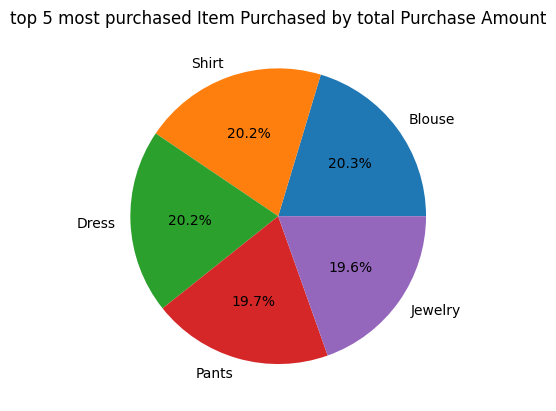

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

x=df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False)[:5]
y=x.index
z=x.values
plt.bar(y,z)
plt.title('top 5 most purchased Item Purchased by total Purchase Amount')
plt.xlabel('Item Purchased')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

plt.pie(z,labels=y,autopct='%1.1f%%')
plt.title('top 5 most purchased Item Purchased by total Purchase Amount')
plt.show()

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

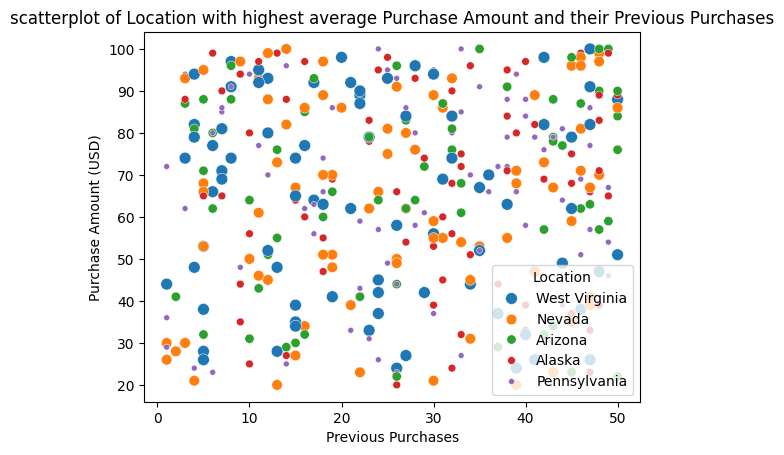

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

x=(df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False)[:5])
y=x.index
filtered=df[df['Location'].isin(y)]
sns.scatterplot(x='Previous Purchases',y='Purchase Amount (USD)',data=filtered,size='Location',hue='Location')
plt.title('scatterplot of Location with highest average Purchase Amount and their Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show()


### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

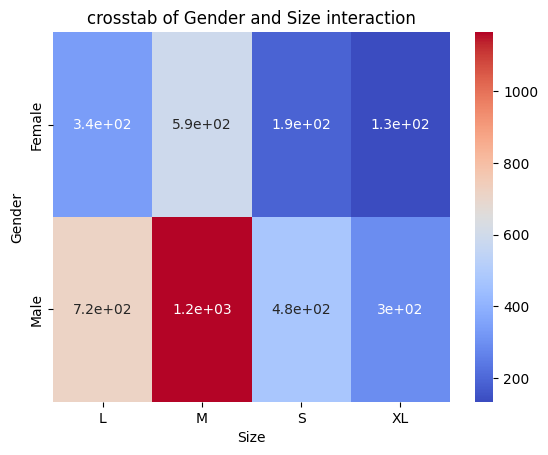

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

x=pd.crosstab(df['Gender'],df['Size'])
sns.heatmap(x,annot=True,cmap='coolwarm')
plt.title('crosstab of Gender and Size interaction')
plt.show()

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

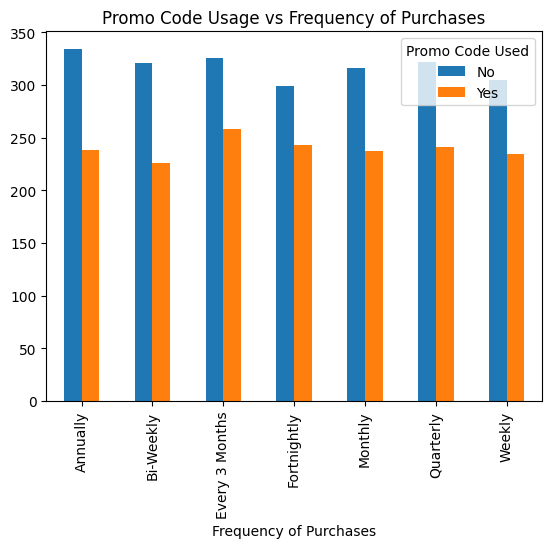

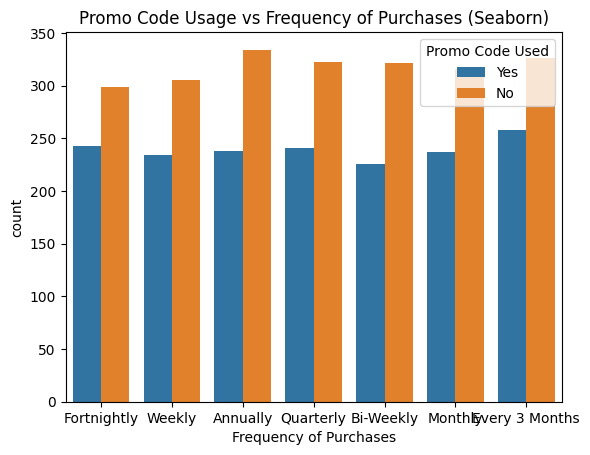

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

promo_ct = pd.crosstab(df['Frequency of Purchases'], df['Promo Code Used'])
promo_ct.plot(kind='bar', stacked=False)
plt.title('Promo Code Usage vs Frequency of Purchases')
plt.show()

sns.countplot(x='Frequency of Purchases', hue='Promo Code Used', data=df)
plt.title('Promo Code Usage vs Frequency of Purchases (Seaborn)')
plt.show()


### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

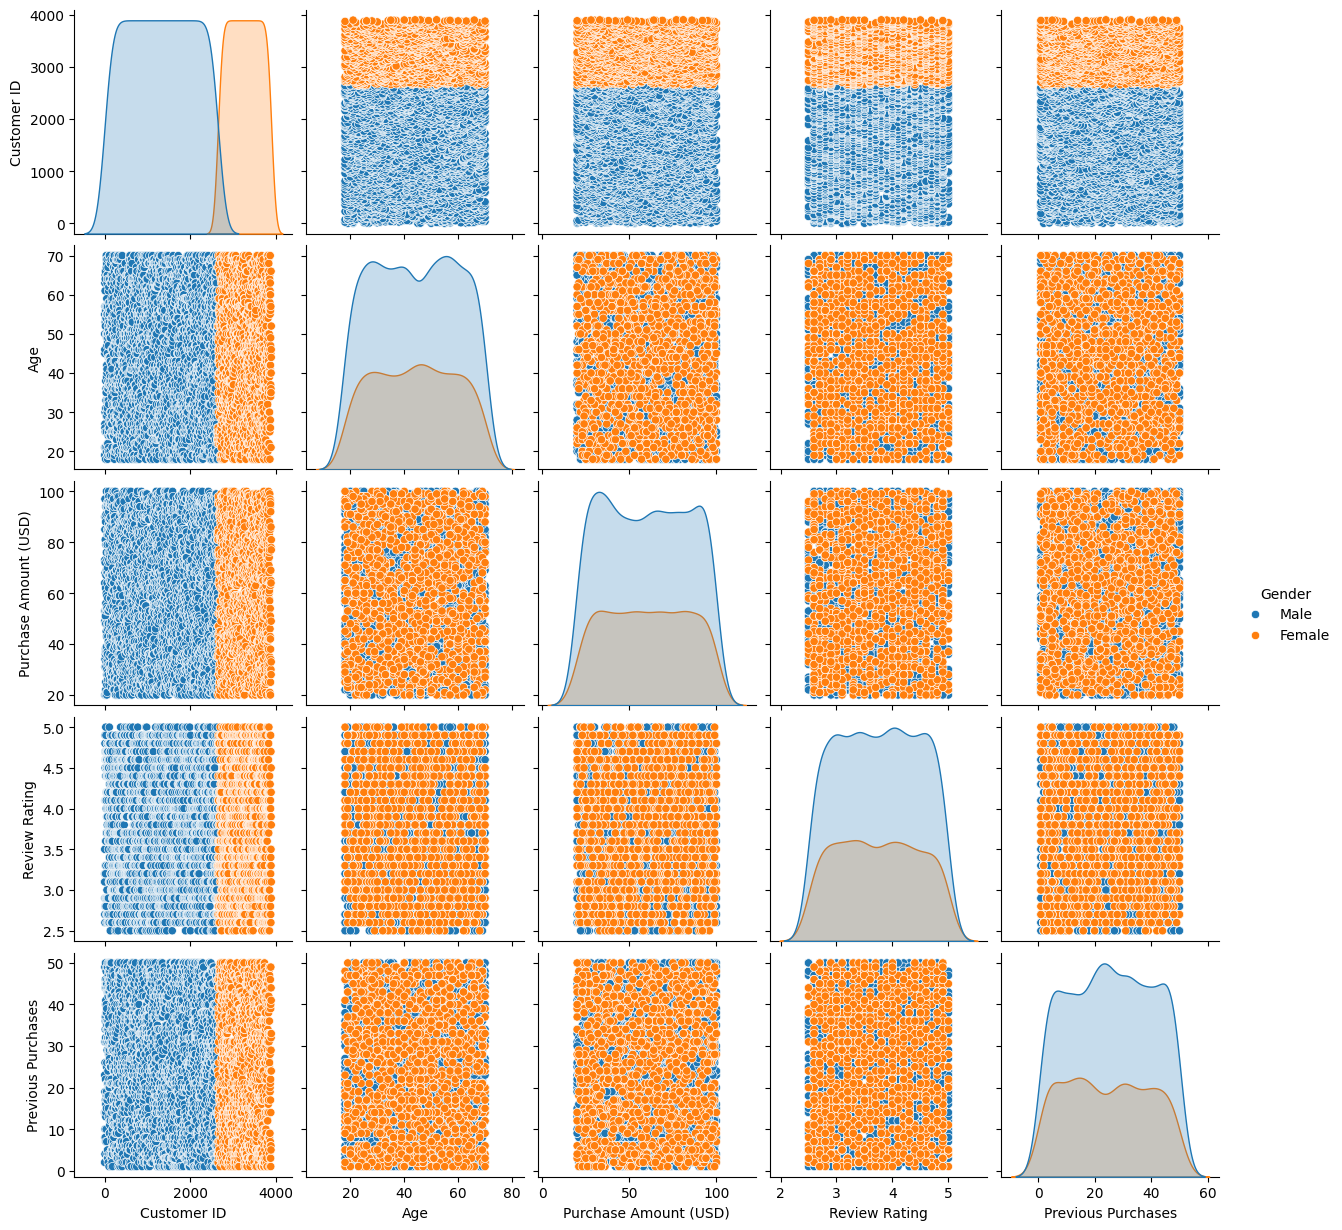

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_data=df.select_dtypes(include=['float64','int64']).join(df['Gender'])
numerical_data
sns.pairplot(numerical_data,hue='Gender')
plt.show()